# Delhi Air Quality Index (AQI) Analysis
This notebook performs an in-depth analysis of Delhi's air quality based on given pollutant data.
**Objectives:**
- Understand pollutant levels over time
- Identify key pollutants affecting air quality
- Explore seasonal variations
- Suggest strategies for improvement

**Dataset Columns:** date, co, no, no2, o3, so2, pm2_5, pm10, nh3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## Load Dataset

In [2]:
df = pd.read_csv('delhiaqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


## Data Info & Cleaning

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


## Basic Statistics

In [5]:
df.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094


## Compute Simplified AQI

In [6]:
df['AQI'] = df[['pm2_5','pm10','no2','so2','o3','co','nh3']].mean(axis=1)
df[['date','AQI']].head()

,date,AQI
0,2023-01-01 00:00:00,298.361429
1,2023-01-01 01:00:00,333.871429
2,2023-01-01 02:00:00,439.475714
3,2023-01-01 03:00:00,543.238571
4,2023-01-01 04:00:00,594.930000


## AQI Trend Over Time

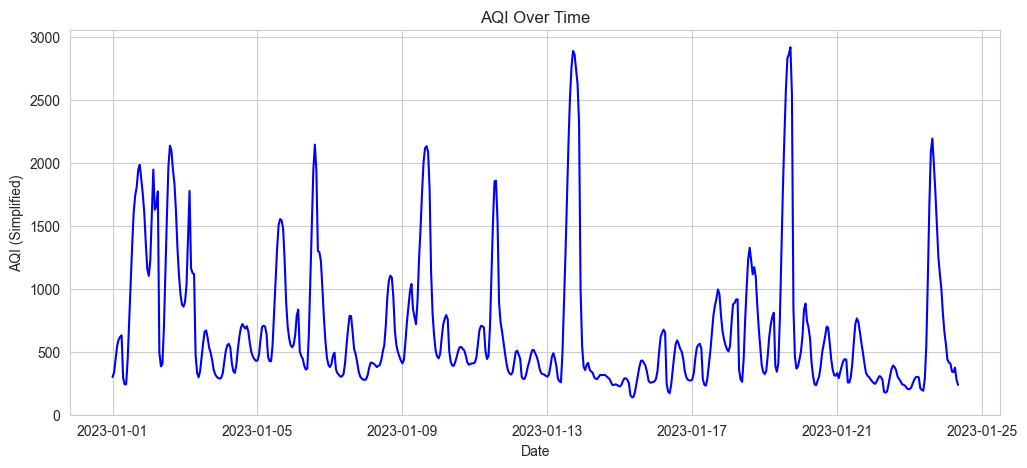

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['AQI'], color='blue')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI (Simplified)')
plt.show()

In [12]:
def calculate_individual_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp["low"] <= concentration <= bp["high"]:
            aqi = ((bp["I_high"] - bp["I_low"]) / (bp["high"] - bp["low"])) * (concentration - bp["low"]) + bp["I_low"]
            return round(aqi)
    return None

# CPCB breakpoints for PM2.5
pm25_breakpoints = [
    {"low": 0, "high": 30, "I_low": 0, "I_high": 50},
    {"low": 31, "high": 60, "I_low": 51, "I_high": 100},
    {"low": 61, "high": 90, "I_low": 101, "I_high": 200},
    {"low": 91, "high": 120, "I_low": 201, "I_high": 300},
    {"low": 121, "high": 250, "I_low": 301, "I_high": 400},
    {"low": 251, "high": 380, "I_low": 401, "I_high": 500},
]

# CPCB breakpoints for PM10
pm10_breakpoints = [
    {"low": 0, "high": 50, "I_low": 0, "I_high": 50},
    {"low": 51, "high": 100, "I_low": 51, "I_high": 100},
    {"low": 101, "high": 250, "I_low": 101, "I_high": 200},
    {"low": 251, "high": 350, "I_low": 201, "I_high": 300},
    {"low": 351, "high": 430, "I_low": 301, "I_high": 400},
    {"low": 431, "high": 550, "I_low": 401, "I_high": 500},
]

df["AQI_PM25"] = df["pm2_5"].apply(lambda x: calculate_individual_aqi(x, pm25_breakpoints))
df["AQI_PM10"] = df["pm10"].apply(lambda x: calculate_individual_aqi(x, pm10_breakpoints))

df["AQI"] = df[["AQI_PM25", "AQI_PM10"]].max(axis=1)


In [13]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

df["AQI_Category"] = df["AQI"].apply(categorize_aqi)


In [14]:
df[["date", "pm2_5", "pm10", "AQI_PM25", "AQI_PM10", "AQI", "AQI_Category"]].head()

,date,pm2_5,pm10,AQI_PM25,AQI_PM10,AQI,AQI_Category
0,2023-01-01 00:00:00,169.29,194.64,338.0,163.0,338.0,Very Poor
1,2023-01-01 01:00:00,182.84,211.08,348.0,174.0,348.0,Very Poor
2,2023-01-01 02:00:00,220.25,260.68,377.0,211.0,377.0,Very Poor
3,2023-01-01 03:00:00,252.90,304.12,402.0,254.0,402.0,Severe
4,2023-01-01 04:00:00,266.36,322.80,413.0,273.0,413.0,Severe


AQI_Category
Severe          353
Very Poor       186
Poor             15
Moderate          5
Satisfactory      2
Name: count, dtype: int64


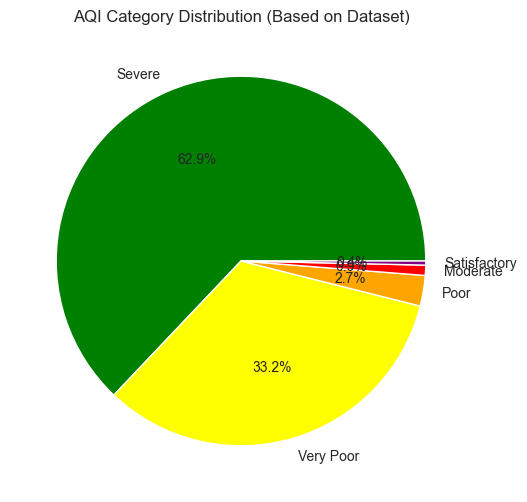

In [15]:
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(classify_aqi)

category_counts = df['AQI_Category'].value_counts()
print(category_counts)

category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['green','yellow','orange','red','purple','maroon'])
plt.title('AQI Category Distribution (Based on Dataset)')
plt.ylabel('')
plt.show()


## Correlation Between Pollutants

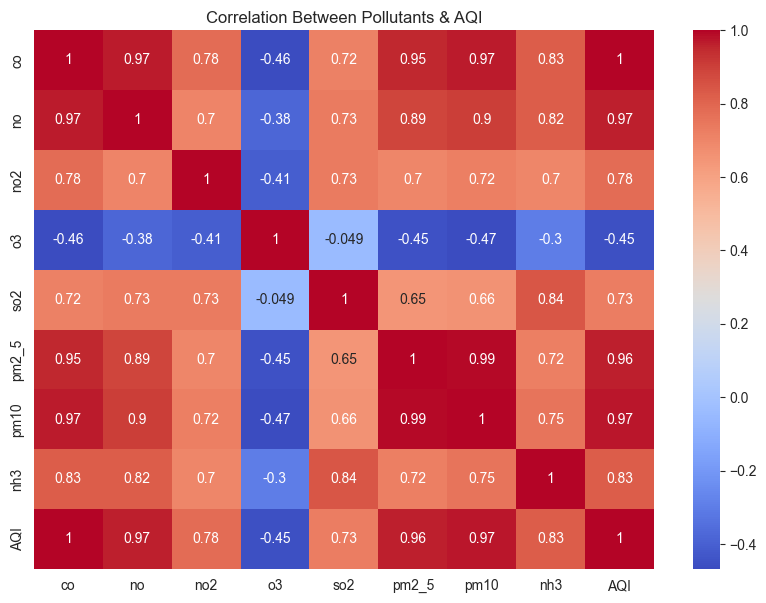

In [9]:
corr = df[['co','no','no2','o3','so2','pm2_5','pm10','nh3','AQI']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants & AQI')
plt.show()

## Conclusion & Observations
- Pollutant levels vary significantly across time.
- Certain pollutants (e.g., PM2.5, PM10, NO2) show strong correlation with AQI.
- Seasonal analysis may indicate worse air quality in specific months.
- Strategies: stricter pollution control, vehicle emission checks, green zones.